<a href="https://colab.research.google.com/github/JulianCKelly/heatlhcare-analytics/blob/main/HealthcareAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, classification_report, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
file_path = '/content/drive/MyDrive/diabetes.csv'
data = pd.read_csv(file_path)

# Read the dataset
data = pd.read_csv(file_path)

# Replace zeros with np.nan for columns where zero is not valid
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Fill missing values with the median of each column
data.fillna(data.median(), inplace=True)

# Features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

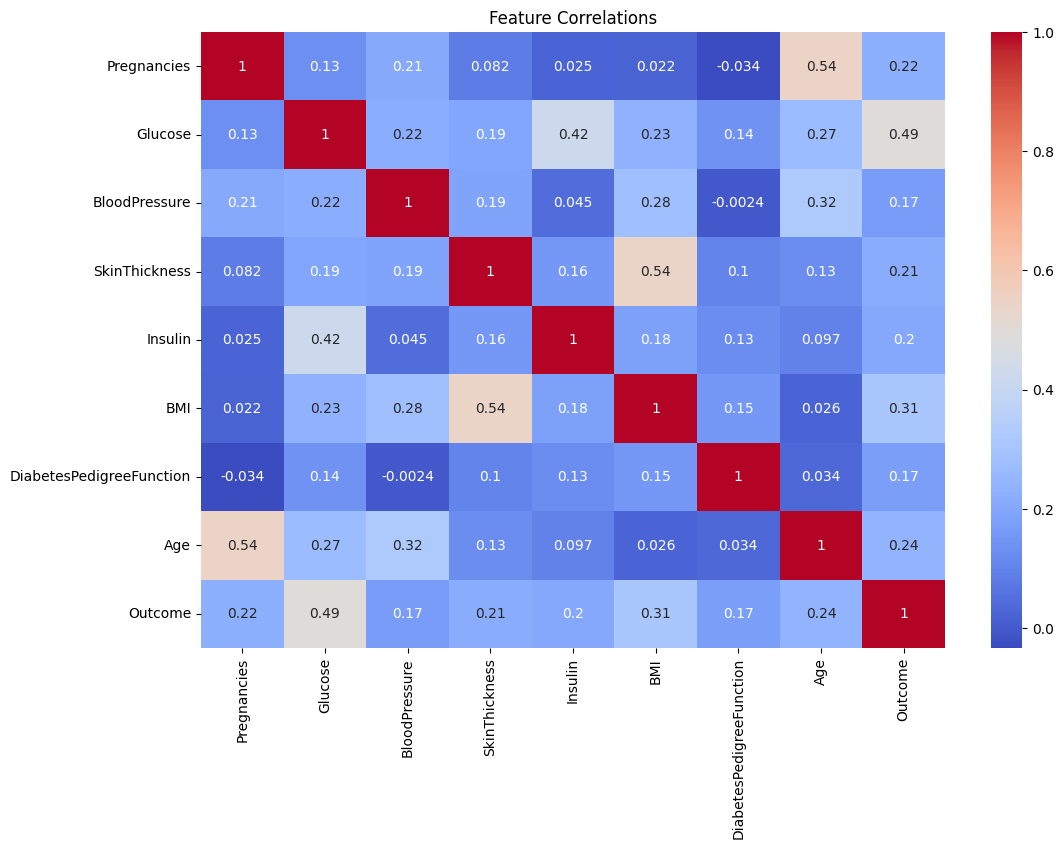

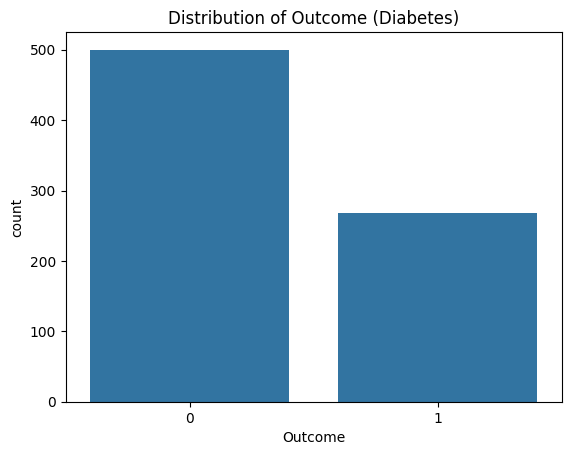

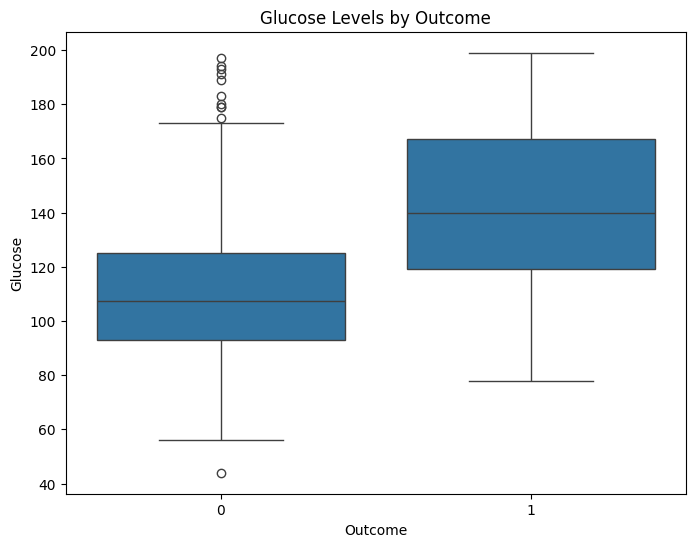

In [ ]:
# Plot correlation matrix to understand feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

# Visualize outcome distribution
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Outcome (Diabetes)')
plt.show()

# Boxplot for glucose levels vs. diabetes outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Glucose Levels by Outcome')
plt.show()

In [ ]:
# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate recall, classification report, and AUC score
print(f"Recall Score: {recall_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Recall Score: 0.65
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [ ]:
# Get predicted probabilities for the positive class (diabetes)
y_proba = model.predict_proba(X_test)[:, 1]

# Adjust threshold (e.g., from 0.5 to 0.3) to increase recall
threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)

# Re-evaluate with the new threshold
print(f"Recall with adjusted threshold: {recall_score(y_test, y_pred_thresh):.2f}")
print(classification_report(y_test, y_pred_thresh))

Recall with adjusted threshold: 0.87
              precision    recall  f1-score   support

           0       0.90      0.62      0.73        99
           1       0.56      0.87      0.68        55

    accuracy                           0.71       154
   macro avg       0.73      0.74      0.71       154
weighted avg       0.78      0.71      0.71       154



In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train the model again on resampled data
model.fit(X_train_res, y_train_res)

# Predictions and evaluation
y_pred_res = model.predict(X_test)

# Evaluate recall and classification report
print(f"Recall with SMOTE: {recall_score(y_test, y_pred_res):.2f}")
print(classification_report(y_test, y_pred_res))

Recall with SMOTE: 0.78
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        99
           1       0.64      0.78      0.70        55

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.77       154



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='recall', cv=5)
grid_search.fit(X_train_res, y_train_res)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions and evaluate the best model
y_pred_best = best_model.predict(X_test)
print(f"Best Recall with GridSearch: {recall_score(y_test, y_pred_best):.2f}")
print(classification_report(y_test, y_pred_best))

Best Recall with GridSearch: 0.78
              precision    recall  f1-score   support

           0       0.86      0.74      0.79        99
           1       0.62      0.78      0.69        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.77      0.75      0.76       154

